# loader

In [6]:
!pip install matplotlib

  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-win_amd64.whl (54 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


tensor([[ 1,  0,  0],
        [ 0,  1, -1],
        [ 0,  1, -2]])


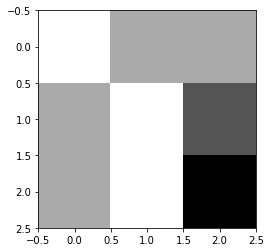

In [18]:
import torch
a = torch.tensor([[1,0,0],[0,1,-1],[0,1,-2]])
print(a)
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.imshow(a, cmap='gray')


In [2]:
import torch
from torchvision.datasets import MNIST, FashionMNIST, CelebA
import medmnist
from medmnist import ChestMNIST, PneumoniaMNIST
from torchvision import transforms
from _utils.load_utils import display_from_batch
from torch.utils.data import Dataset, DataLoader, TensorDataset

# params: batch_size
batch_size = 256

# train = FashionMNIST("./_data", train=True, download=True, transform=transforms.Compose([transforms.FloatTensor()]))
# test = FashionMNIST("./_data", train=False, download=True, transform=transforms.Compose([transforms.FloatTensor()]))
# classnames = {
#     0:'T-shirt/top',
#     1:'Trouser',
#     2:'Pullover',
#     3:'Dress',
#     4:'Coat',
#     5:'Sandal',
#     6:'Shirt',
#     7:'Sneaker',
#     8:'Bag',
#     9:'Ankle boot',
# }
# train = PneumoniaMNIST(root="./_data", split="train", download=True, transform=transforms.Compose([transforms.ToTensor()]))
# test = PneumoniaMNIST(root="./_data", split="test", download=True, transform=transforms.ToTensor())
# classnames={0: 'normal', 1: 'pneumonia'}

# train = ChestMNIST(root="./_data", split="train", download=True, transform=transforms.ToTensor())
# test = ChestMNIST(root="./_data", split="test", download=True, transform=transforms.ToTensor())
# classnames={
#     '0': 'atelectasis', 
#     '1': 'cardiomegaly', 
#     '2': 'effusion', 
#     '3': 'infiltration', 
#     '4': 'mass', 
#     '5': 'nodule', 
#     '6': 'pneumonia', 
#     '7': 'pneumothorax', 
#     '8': 'consolidation', 
#     '9': 'edema', 
#     '10': 'emphysema', 
#     '11': 'fibrosis', 
#     '12': 'pleural', 
#     '13': 'hernia'
# }


train = CelebA(root='./_data', split='train', transform=transforms.Compose([transforms.ToTensor()]), download=True)
test = CelebA(root='./_data', split='test', transform=transforms.Compose([transforms.ToTensor()]), download=True)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)

# return train_loader, test_loader

Files already downloaded and verified
Files already downloaded and verified


In [2]:
print(train)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./_data
    Split: Train
    StandardTransform
Transform: ToTensor()


# _utils

In [3]:
train_iter = iter(train_loader)

tensor([0, 0, 2, 2])


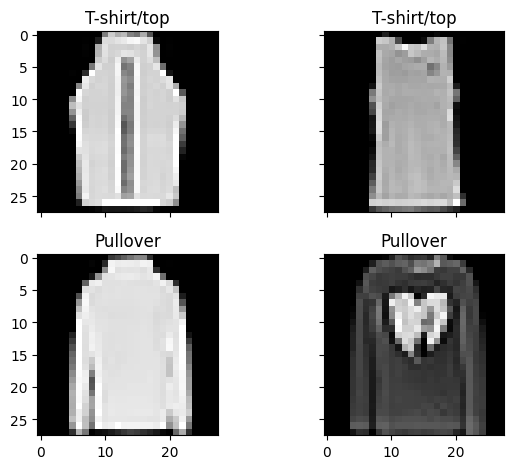

In [4]:
train_batch = next(train_iter)
# params: batch, classname, nrows, ncols
print(train_batch[1][:4])
# print(train_batch[1].squeeze(1))
# print(train_batch[1].squeeze(1).to(torch.long))
# print(train_batch[1].squeeze(1).to(torch.long).dtype)
display_from_batch(train_batch, 2, 2, classnames)

# return none

# model

In [5]:
import torch
from torch import nn, optim

class MyCNN(nn.Module):
    def __init__(self, height, width, out_features):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=0)
        self.act1 = nn.ReLU()
        h = (height - 4)
        w = (width - 4)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=0)
        self.act2 = nn.ReLU()
        h = (h - 4)
        w = (w - 4)
        self.pool2 = nn.MaxPool2d(2,2)
        h = h / 2
        w = w / 2
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=0)
        self.act3 = nn.ReLU()
        h = (h - 4)
        w = (w - 4)
        self.pool3 = nn.MaxPool2d(2,2)
        h = h / 2
        w = w / 2
        # 3x3 이미지가 됨
        self.fc4 = nn.Linear(64 * int(h) * int(w), 100)
        self.act4 = nn.ReLU()
        self.fc5 = nn.Linear(100, out_features)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)
        
        # 모듈화 필요>>>
        sizes = x.size()
        x = x.view(sizes[0], -1)
        # <<<모듈화 필요
        
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        return x


In [6]:
model = MyCNN(height=28, width=28, out_features=10)
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list
print('MyCNN: ', sum(numel_list), numel_list)
from torchinfo import summary
summary(model, input_size=(1,1,28,28), device='cpu') 

MyCNN:  123222 [400, 16, 12800, 32, 51200, 64, 57600, 100, 1000, 10]


Layer (type:depth-idx)                   Output Shape              Param #
MyCNN                                    [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 24, 24]           416
├─ReLU: 1-2                              [1, 16, 24, 24]           --
├─Conv2d: 1-3                            [1, 32, 20, 20]           12,832
├─ReLU: 1-4                              [1, 32, 20, 20]           --
├─MaxPool2d: 1-5                         [1, 32, 10, 10]           --
├─Conv2d: 1-6                            [1, 64, 6, 6]             51,264
├─ReLU: 1-7                              [1, 64, 6, 6]             --
├─MaxPool2d: 1-8                         [1, 64, 3, 3]             --
├─Linear: 1-9                            [1, 100]                  57,700
├─ReLU: 1-10                             [1, 100]                  --
├─Linear: 1-11                           [1, 10]                   1,010
Total params: 123,222
Trainable params: 123,222
Non-trainable params:

# train

In [7]:
import torch
from torch import nn, optim
import collections
import tqdm
all_acc_dict = collections.OrderedDict()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import datetime
current_time = datetime.datetime.today() # 2021-08-15 20:58:43.302125
current_time = current_time.strftime('%Y%m%d%H%M%S') # 20210815205827

In [8]:
def eval_net(model, data_loader, device="cpu"):
    model.eval()
    ys = []
    ypreds = []
    for x, y in data_loader:
        x = x.to(device)
        y = y.to(device)
        # y = y.squeeze(1).to(torch.long).to(device)
        with torch.no_grad():
            _, y_pred = model(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    acc = (ys == ypreds).float().sum() / len(ys)
    return acc.item()

In [9]:
n_epochs = 100

model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

train_losses = []
train_acc = []
val_acc = []
for epoch in range(n_epochs):
    running_loss = 0.0
    model.train()
    n = 0
    n_acc = 0
    # 시간이 많이 걸리므로 tqdm을 사용해서 진행바를 표시
    for i, (xx, yy) in tqdm.tqdm(enumerate(train_loader), total=len(train_loader)):
        xx = xx.to(device)
        yy = yy.to(device)
        # yy = yy.squeeze(1).to(torch.long).to(device)
        h = model(xx)
        loss = loss_fn(h, yy)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        n += len(xx)
        _, y_pred = h.max(1)
        n_acc += (yy == y_pred).float().sum().item()
    train_losses.append(running_loss / i)
    # 훈련 데이터의 예측 정확도
    train_acc.append(n_acc / n)

    # 검증 데이터의 예측 정확도
    val_acc.append(eval_net(model, test_loader, device))
    print(epoch, train_losses[-1], train_acc[-1], val_acc[-1], flush=True)
print('-----------training finished-----------')
print('train_losses: ', train_losses)
print('train_acc: ', train_acc)
print('val_acc: ', val_acc)

100%|█████████████████████████████████████████| 234/234 [00:07<00:00, 29.39it/s]


0 2.306303170617558 0.13603432158119658 0.15034054219722748


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.67it/s]


1 2.056442906416537 0.2961738782051282 0.563401460647583


100%|█████████████████████████████████████████| 234/234 [00:06<00:00, 38.59it/s]


2 1.0087311257620226 0.6194744925213675 0.6586538553237915


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.28it/s]


3 0.8143085868061868 0.6936097756410257 0.6737780570983887


100%|█████████████████████████████████████████| 234/234 [00:06<00:00, 38.73it/s]


4 0.7385250294157364 0.7228231837606838 0.7237580418586731


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.44it/s]


5 0.6918539594171385 0.7431891025641025 0.7425881624221802


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.32it/s]


6 0.6565865608243984 0.7554086538461539 0.7597155570983887


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.54it/s]


7 0.6333193926084707 0.7653412126068376 0.7575120329856873


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.30it/s]


8 0.6152223133733856 0.7712339743589743 0.765625


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.10it/s]


9 0.5959182781978738 0.7802150106837606 0.7768429517745972


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.04it/s]


10 0.5779559594367195 0.7873597756410257 0.7736378312110901


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.11it/s]


11 0.5644946691815945 0.7906984508547008 0.7751402258872986


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.70it/s]


12 0.5525223744529512 0.7971087072649573 0.7836538553237915


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.31it/s]


13 0.5370414060072838 0.8034354967948718 0.7727363705635071


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 39.54it/s]


14 0.5247860997275733 0.807792467948718 0.802584171295166


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.84it/s]


15 0.5170008702595347 0.810813969017094 0.7934695482254028


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.90it/s]


16 0.5019518697210648 0.8169571314102564 0.8081931471824646


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.01it/s]


17 0.49619489115195214 0.8173911591880342 0.7994791865348816


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.03it/s]


18 0.4845295579136697 0.8205962873931624 0.8199118971824646


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.87it/s]


19 0.47651086523809144 0.8248364049145299 0.8156049847602844


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.83it/s]


20 0.4703686141404983 0.8279246794871795 0.823317289352417


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.88it/s]


21 0.4630868303161834 0.8305121527777778 0.8254206776618958


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.90it/s]


22 0.4584410698372919 0.8327657585470085 0.8300280570983887


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.90it/s]


23 0.45094845555882596 0.8353198450854701 0.8287259936332703


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.79it/s]


24 0.4439501356925064 0.8374732905982906 0.8282251954078674


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.87it/s]


25 0.4394882913566966 0.8395599626068376 0.8266226053237915


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.90it/s]


26 0.4344742562893634 0.8422309027777778 0.8240184187889099


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.83it/s]


27 0.42766318671693104 0.8436331463675214 0.83984375


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.98it/s]


28 0.42280128636585285 0.8457698985042735 0.8363381624221802


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.94it/s]


29 0.419025404258859 0.8474058493589743 0.836838960647583


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.93it/s]


30 0.4123797774826508 0.850761217948718 0.8432492017745972


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.96it/s]


31 0.40958063157331276 0.8503939636752137 0.8453525900840759


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.84it/s]


32 0.40484881106876 0.8526642628205128 0.8438501954078674


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.96it/s]


33 0.40144159775946786 0.8535490117521367 0.8431490659713745


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.83it/s]


34 0.3982188143315745 0.8543836805555556 0.8449519276618958


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.91it/s]


35 0.3919975083529182 0.8563368055555556 0.8427484035491943


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.91it/s]


36 0.3899285821443975 0.8570045405982906 0.8508613705635071


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.86it/s]


37 0.38575175711525356 0.8580562232905983 0.8539663553237915


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.83it/s]


38 0.3838063254632663 0.8596587873931624 0.8452523946762085


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.83it/s]


39 0.37946960278846675 0.862129407051282 0.8550681471824646


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.89it/s]


40 0.37551421592163936 0.8618289262820513 0.8537660241127014


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.78it/s]


41 0.3734026675316397 0.863548344017094 0.8552684187889099


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.84it/s]


42 0.3687694892607022 0.8667534722222222 0.8559695482254028


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.75it/s]


43 0.3658951600222117 0.8666366185897436 0.8457531929016113


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.75it/s]


44 0.36452927379649086 0.8664863782051282 0.8574719429016113


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.78it/s]


45 0.3615756218397566 0.8679053151709402 0.8525640964508057


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.84it/s]


46 0.3595039389164151 0.8685062767094017 0.8615785241127014


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 41.01it/s]


47 0.3545524751040045 0.8714443108974359 0.8586738705635071


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.95it/s]


48 0.352692999936992 0.8718115651709402 0.8501602411270142


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.91it/s]


49 0.3503694414069213 0.8726629273504274 0.8402444124221802


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.91it/s]


50 0.3459739587849302 0.8739483173076923 0.8590745329856873


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.87it/s]


51 0.34447857545680755 0.8734642094017094 0.8608773946762085


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.31it/s]


52 0.34218414198175523 0.8753171741452992 0.8511618971824646


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.94it/s]


53 0.34096398495553387 0.8759515224358975 0.8509615659713745


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.87it/s]


54 0.33682565653272967 0.8776709401709402 0.859375


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.83it/s]


55 0.3369622908436689 0.8768696581196581 0.8657852411270142


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


56 0.33347743519386 0.8776375534188035 0.8651843070983887


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.67it/s]


57 0.3309648986026453 0.8788394764957265 0.868088960647583


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.88it/s]


58 0.3289654624564453 0.8796741452991453 0.8633814454078674


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.95it/s]


59 0.32852024888787656 0.8798410790598291 0.8612780570983887


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.72it/s]


60 0.3243250310932618 0.8822115384615384 0.8573718070983887


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.73it/s]


61 0.32255006386486756 0.8816773504273504 0.8696914911270142


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.60it/s]


62 0.32041817903518677 0.8829126602564102 0.8681890964508057


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.73it/s]


63 0.31920864519387354 0.884498530982906 0.8678886294364929


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


64 0.3164584811281237 0.8846988514957265 0.859375


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.74it/s]


65 0.31599676954388106 0.8852330395299145 0.8670873641967773


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


66 0.313277449091105 0.885299813034188 0.8686898946762085


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


67 0.3107725320455854 0.8878872863247863 0.8704928159713745


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.81it/s]


68 0.31162232237312415 0.8852330395299145 0.8636819124221802


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.75it/s]


69 0.3082266211381798 0.8873530982905983 0.8700921535491943


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.85it/s]


70 0.3057498148454617 0.8890725160256411 0.8694912195205688


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.71it/s]


71 0.3046914628774823 0.8893062232905983 0.8747996687889099


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.77it/s]


72 0.30196372685002665 0.8885717147435898 0.8736979365348816


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.91it/s]


73 0.3008008158002289 0.8890558226495726 0.8742988705635071


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.79it/s]


74 0.2991522462966616 0.8905415331196581 0.8715945482254028


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.60it/s]


75 0.29783973967568556 0.892311030982906 0.8691906929016113


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.50it/s]


76 0.29624026598081055 0.8920272435897436 0.8687900900840759


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.40it/s]


77 0.29319406182469215 0.8941139155982906 0.8717948794364929


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.43it/s]


78 0.29219328129240374 0.893112313034188 0.8726963400840759


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.53it/s]


79 0.29193789547093435 0.8929620726495726 0.8619791865348816


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.33it/s]


80 0.2899936080746385 0.8934294871794872 0.8660857677459717


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.59it/s]


81 0.29012560716514424 0.8927116720085471 0.8753004670143127


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.56it/s]


82 0.2865848740155093 0.8954159989316239 0.8716947436332703


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.45it/s]


83 0.2844040721910706 0.8957999465811965 0.8777043223381042


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.55it/s]


84 0.2854708855244223 0.8954994658119658 0.8788061141967773


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.64it/s]


85 0.28146086428554273 0.8965344551282052 0.8758012652397156


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.53it/s]


86 0.28084389775863533 0.896217280982906 0.8726963400840759


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.67it/s]


87 0.27748971237389314 0.8980869391025641 0.8621795177459717


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.60it/s]


88 0.277425506212169 0.8980869391025641 0.876802921295166


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.55it/s]


89 0.2783099531871566 0.8971688034188035 0.87890625


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.60it/s]


90 0.2753158824382422 0.8984708867521367 0.8777043223381042


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.70it/s]


91 0.2735794750661809 0.8996895032051282 0.8765023946762085


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.63it/s]


92 0.27044038020490063 0.9007578792735043 0.8784054517745972


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.49it/s]


93 0.2712521351586084 0.8998731303418803 0.8659855723381042


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.69it/s]


94 0.27016606626336664 0.9004073183760684 0.8766025900840759


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.63it/s]


95 0.2681702619714287 0.9014256143162394 0.8799078464508057


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.73it/s]


96 0.26605742818040395 0.90234375 0.879807710647583


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.64it/s]


97 0.2656927853822708 0.9022268963675214 0.8603765964508057


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.57it/s]


98 0.2643988758581391 0.9029947916666666 0.8800080418586731


100%|█████████████████████████████████████████| 234/234 [00:05<00:00, 40.24it/s]


99 0.26410239608758507 0.9030281784188035 0.8811097741127014
-----------training finished-----------
train_losses:  [2.306303170617558, 2.056442906416537, 1.0087311257620226, 0.8143085868061868, 0.7385250294157364, 0.6918539594171385, 0.6565865608243984, 0.6333193926084707, 0.6152223133733856, 0.5959182781978738, 0.5779559594367195, 0.5644946691815945, 0.5525223744529512, 0.5370414060072838, 0.5247860997275733, 0.5170008702595347, 0.5019518697210648, 0.49619489115195214, 0.4845295579136697, 0.47651086523809144, 0.4703686141404983, 0.4630868303161834, 0.4584410698372919, 0.45094845555882596, 0.4439501356925064, 0.4394882913566966, 0.4344742562893634, 0.42766318671693104, 0.42280128636585285, 0.419025404258859, 0.4123797774826508, 0.40958063157331276, 0.40484881106876, 0.40144159775946786, 0.3982188143315745, 0.3919975083529182, 0.3899285821443975, 0.38575175711525356, 0.3838063254632663, 0.37946960278846675, 0.37551421592163936, 0.3734026675316397, 0.3687694892607022, 0.3658951600222117

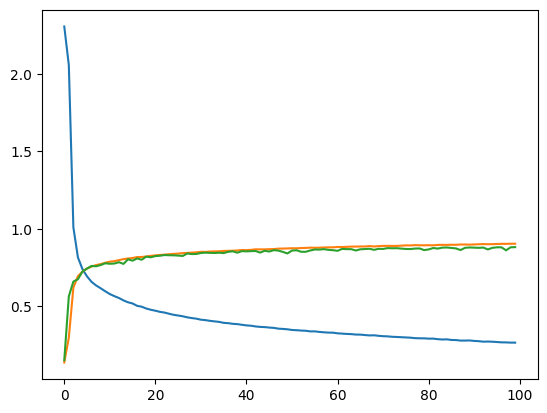

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.plot(train_acc)
plt.plot(val_acc)